In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

import numpy as np

# Load the Datasets

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [11]:
y_train.shape

(50000, 1)

In [13]:
y_test.shape

(10000, 1)

# y_train is a 2d  array for our cllassificaton having 1d array is good enough, so we will convert this to now 1d array

In [15]:
y_train = y_train.reshape(-1,)

In [17]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [19]:
y_test = y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [21]:
classes = ["airplane","automobile","bird","cat","deer","dog","frong","horse","ship","truck"]

#let's plot some images to see what see they are

In [23]:
def plot_sample(X,y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

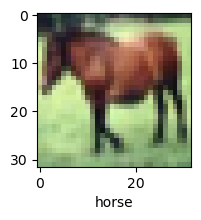

In [29]:
plot_sample(X_train,y_train, 7)

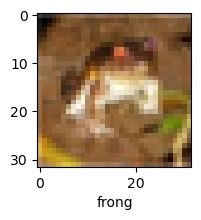

In [31]:
plot_sample(X_train,y_train,0)

normalize the images to a number from 0 to 1. Immage has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255 

# Normalize the training data

In [25]:
X_train = X_train/255.0
X_test = X_test/255.0

# Build Simple ANN for image classification

In [36]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10, activation="relu")
])

ann.compile(optimizer='SGD',
            loss="sparse_categorical_crossentropy",
            metrics= ["accuracy"])
ann.fit(X_train,y_train,epochs=5)
                 

C:\Users\eternal\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.1008 - loss: 2.3577
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.1010 - loss: 2.3026
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.1012 - loss: 2.3026
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.0983 - loss: 2.3026
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.1000 - loss: 2.3026


In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict (X_test)
y_pred_classes= [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test,y_pred_classes))

NameError: name 'ann' is not defined

In [37]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Now let us build cnn to train our images

In [29]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3), activation = "relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation= "softmax")])

C:\Users\eternal\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [33]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3822 - loss: 1.6912
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5946 - loss: 1.1592
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6458 - loss: 1.0080
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6834 - loss: 0.9058
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7114 - loss: 0.8302
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7259 - loss: 0.7851
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7473 - loss: 0.7251
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7640 - loss: 0.6805
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7790 - loss: 0.6390
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7934 - loss: 0.5919


With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features



In [36]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7014 - loss: 0.9020


[0.9058643579483032, 0.6990000009536743]

In [38]:
y_pred = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [40]:
y_pred[:5]

array([[2.7358175e-05, 3.4798755e-05, 3.9907909e-04, 9.3839526e-01,
        7.9684278e-06, 5.5554681e-02, 9.3634363e-04, 8.2441493e-06,
        4.5555434e-03, 8.0721627e-05],
       [8.4025809e-04, 2.7511972e-03, 1.5421048e-05, 1.4281173e-06,
        1.7889992e-07, 4.3934062e-08, 1.9463305e-07, 3.4202632e-08,
        9.9622345e-01, 1.6780652e-04],
       [3.4281529e-02, 2.9102381e-02, 2.4729625e-03, 8.5643521e-03,
        1.7575282e-03, 2.1212748e-03, 1.5770298e-04, 2.0822294e-03,
        9.1636592e-01, 3.0941109e-03],
       [9.4216132e-01, 1.1594242e-02, 5.7815989e-03, 4.0262337e-03,
        1.2683927e-02, 2.1546868e-05, 3.3926847e-04, 1.2583979e-03,
        1.9505270e-02, 2.6281269e-03],
       [1.9531852e-05, 2.3248323e-05, 1.3129105e-02, 2.2088846e-03,
        9.4964731e-01, 3.3403904e-04, 3.4563072e-02, 5.0388935e-05,
        1.8988201e-05, 5.4086754e-06]], dtype=float32)

In [44]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [46]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [48]:
classes[y_classes[3]]


'airplane'

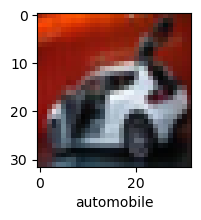

In [54]:
plot_sample(X_test, y_test,6)


In [52]:
classes[y_classes[3]]


'airplane'